In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#loading the dataset
df = pd.read_csv('/content/d3.csv')
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,deg,T m/s,m/s,m,sec,sec,deg,hPa,degC,degC,degC,nmi,ft
1,2021,1,1,0,0,76,10.1,12,2.2,9.1,99,40,1017.5,26.9,27.1,999,99,99
2,2021,1,1,0,10,79,10.2,12.5,99,99,99,999,1017.6,27,999,999,99,99
3,2021,1,1,0,20,80,10,11.8,99,99,99,999,1017.6,27,999,999,99,99
4,2021,1,1,0,30,80,9.6,11.8,99,99,99,999,1017.6,27,999,999,99,99


In [ ]:
# Remove the first row
df = df.iloc[1:]
# Print the modified DataFrame
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
1,2021,1,1,0,0,76,10.1,12,2.2,9.1,99,40,1017.5,26.9,27.1,999,99,99
2,2021,1,1,0,10,79,10.2,12.5,99,99,99,999,1017.6,27,999,999,99,99
3,2021,1,1,0,20,80,10,11.8,99,99,99,999,1017.6,27,999,999,99,99
4,2021,1,1,0,30,80,9.6,11.8,99,99,99,999,1017.6,27,999,999,99,99
5,2021,1,1,0,40,73,10.1,12.8,99,99,99,999,1017.7,26.8,999,999,99,99


In [ ]:
df.isnull().sum()

#YY     0
MM      0
DD      0
hh      0
mm      0
WDIR    0
WSPD    0
GST     0
WVHT    0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
VIS     0
TIDE    0
dtype: int64

In [ ]:
# Convert specific columns to numeric values
columns_to_convert = ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# Alternatively, convert all object columns to numeric values
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
df.isnull().sum()

#YY     0
MM      0
DD      0
hh      0
mm      0
WDIR    0
WSPD    0
GST     0
WVHT    0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
VIS     0
TIDE    0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(4453, 18)

In [ ]:
unique_values = df["mm"].unique()
print(unique_values)

[ 0 10 20 30 40 50]


In [ ]:
# Extract rows where mm=0
df = df[df["mm"] == 0]

# Print the rows
print(df)

       #YY  MM  DD  hh  mm  WDIR  WSPD   GST  WVHT   DPD  APD  MWD    PRES  \
1     2021   1   1   0   0    76  10.1  12.0   2.2   9.1   99   40  1017.5   
7     2021   1   1   1   0    74   9.8  13.1   2.3   9.1   99   34  1017.7   
13    2021   1   1   2   0    75  10.6  12.8   2.7   9.5   99   32  1017.9   
19    2021   1   1   3   0    69  10.9  13.4   2.9   8.7   99   38  1018.2   
25    2021   1   1   4   0    67   9.8  12.2   2.5  10.0   99   36  1018.0   
...    ...  ..  ..  ..  ..   ...   ...   ...   ...   ...  ...  ...     ...   
4424  2021   1  31  19   0    80   9.9  13.4   3.4  14.3   99    6  1015.6   
4430  2021   1  31  20   0    77   9.3  11.4   2.9  14.3   99   12  1015.6   
4436  2021   1  31  21   0    87   7.9  10.2   3.1  14.3   99   12  1015.8   
4442  2021   1  31  22   0    82   9.5  12.2   2.9  13.3   99   16  1015.6   
4448  2021   1  31  23   0    81   9.5  11.8   2.9  14.3   99   16  1015.8   

      ATMP  WTMP  DEWP  VIS  TIDE  
1     26.9  27.1   999   99

In [ ]:
#here we reset the index
df = df.reset_index(drop=True)
# Print the modified DataFrame
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2021,1,1,0,0,76,10.1,12.0,2.2,9.1,99,40,1017.5,26.9,27.1,999,99,99
1,2021,1,1,1,0,74,9.8,13.1,2.3,9.1,99,34,1017.7,26.9,27.3,999,99,99
2,2021,1,1,2,0,75,10.6,12.8,2.7,9.5,99,32,1017.9,26.8,27.2,999,99,99
3,2021,1,1,3,0,69,10.9,13.4,2.9,8.7,99,38,1018.2,26.8,27.1,999,99,99
4,2021,1,1,4,0,67,9.8,12.2,2.5,10.0,99,36,1018.0,26.9,27.0,999,99,99


In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Assuming you have a DataFrame called 'df'
selected_columns = ['WVHT']  # Specify the columns you want to select

df1 = df[selected_columns]  # Create a new DataFrame by selecting the specified columns

# Print the new DataFrame
print(df1)

     WVHT
0     2.2
1     2.3
2     2.7
3     2.9
4     2.5
..    ...
738   3.4
739   2.9
740   3.1
741   2.9
742   2.9

[743 rows x 1 columns]


In [ ]:
unique_values = df1['WVHT'].unique()
unique_values

array([2.2, 2.3, 2.7, 2.9, 2.5, 2.6, 2.4, 2.8, 2.1, 2. , 1.9, 1.8, 1.6,
       1.7, 1.5, 1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.8, 0.7, 0.6, 3.2, 3.1,
       3. , 3.3, 3.5, 3.7, 3.4, 4. ])

<Axes: >

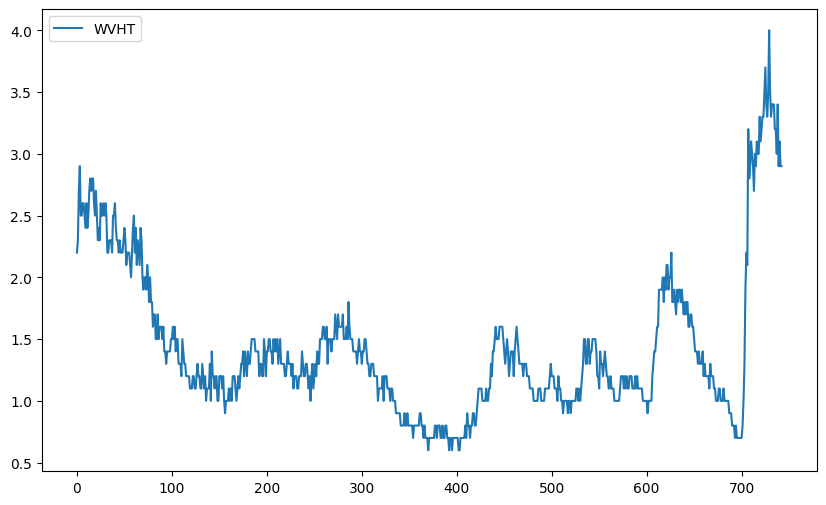

In [ ]:
df1.plot(figsize=(10,6))

In [ ]:
# Select the specific column you want to focus on (e.g., "WVHT" - significant wave height)
target_col = "WVHT"
data = df1[[target_col]].values

In [ ]:
# Normalize the data


In [ ]:
# Define the number of previous time steps to consider for prediction
time_steps = 100

In [ ]:
# Prepare the data in a suitable format for LSTM
X = []
y = []
for i in range(time_steps, len(data)):
    X.append(data[i - time_steps:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)

In [ ]:
# Split the data into training, validation, and testing sets (70% training, 20% validation, 10% testing)
train_split = 0.7
val_split = 0.2
train_index = int(train_split * len(X))
val_index = int((train_split + val_split) * len(X))

In [ ]:
train_X, train_y = X[:train_index], y[:train_index]
val_X, val_y = X[train_index:val_index], y[train_index:val_index]
test_X, test_y = X[val_index:], y[val_index:]

In [ ]:
# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
val_X = np.reshape(val_X, (val_X.shape[0], val_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))


In [ ]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)
print(val_X.shape)
print(val_y.shape)

(450, 100, 1)
(450,)
(65, 100, 1)
(65,)
(128, 100, 1)
(128,)


In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Assuming train_X has the appropriate shape (samples, timesteps, features)

# Create the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]), kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.8))
model.add(Dense(1))
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.01))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the LSTM model with early stopping based on validation loss
early_stopping = EarlyStopping(patience=600, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs=50, batch_size=1024, validation_data=(val_X, val_y), verbose=1, callbacks=[early_stopping])

NameError: ignored

In [ ]:
# Get the loss values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

NameError: ignored

In [ ]:
# Plot the loss and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
# Make predictions
train_preds = model.predict(train_X)
val_preds = model.predict(val_X)
test_preds = model.predict(test_X)

3/3 [==============================] - 0s 21ms/step


In [ ]:
# Inverse transform the predictions to their original scale
train_preds = scaler.inverse_transform(train_preds)
val_preds = scaler.inverse_transform(val_preds)
test_preds = scaler.inverse_transform(test_preds)

In [ ]:
# Inverse transform the actual values to their original scale
train_actuals = scaler.inverse_transform([train_y])
val_actuals = scaler.inverse_transform([val_y])
test_actuals = scaler.inverse_transform([test_y])

In [ ]:
# Calculate RMSE (Root Mean Squared Error) for training, validation, and testing predictions
train_rmse = np.sqrt(mean_squared_error(train_actuals[0], train_preds[:, 0]))
val_rmse = np.sqrt(mean_squared_error(val_actuals[0], val_preds[:, 0]))
test_rmse = np.sqrt(mean_squared_error(test_actuals[0], test_preds[:, 0]))

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.12935347562958535
Validation RMSE: 0.19292818485431523
Test RMSE: 0.5642314715553073


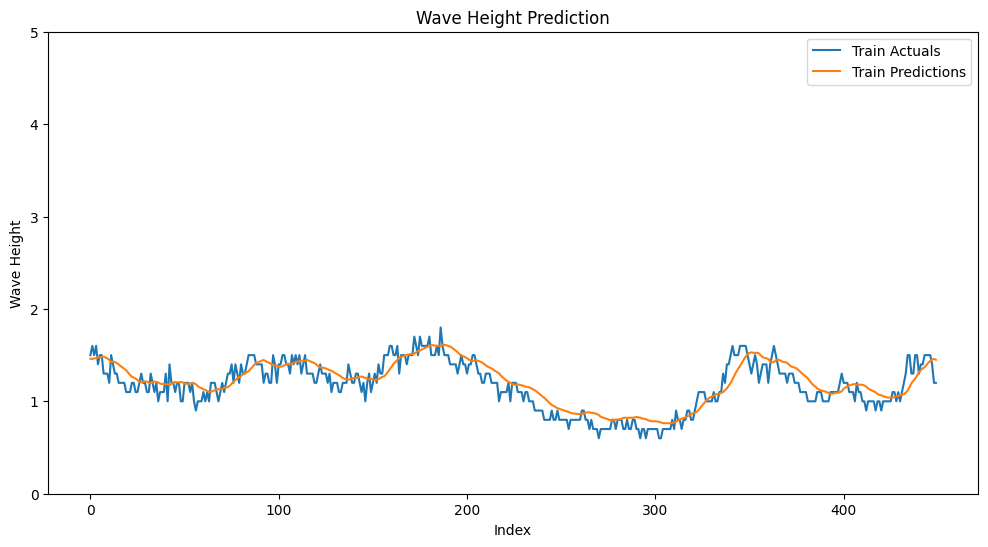

In [ ]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_actuals[0], label="Train Actuals")
plt.plot(train_preds[:, 0], label="Train Predictions")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Wave Height")
plt.title("Wave Height Prediction")
plt.ylim(0, 5)  # Set the y-axis limits
plt.show()

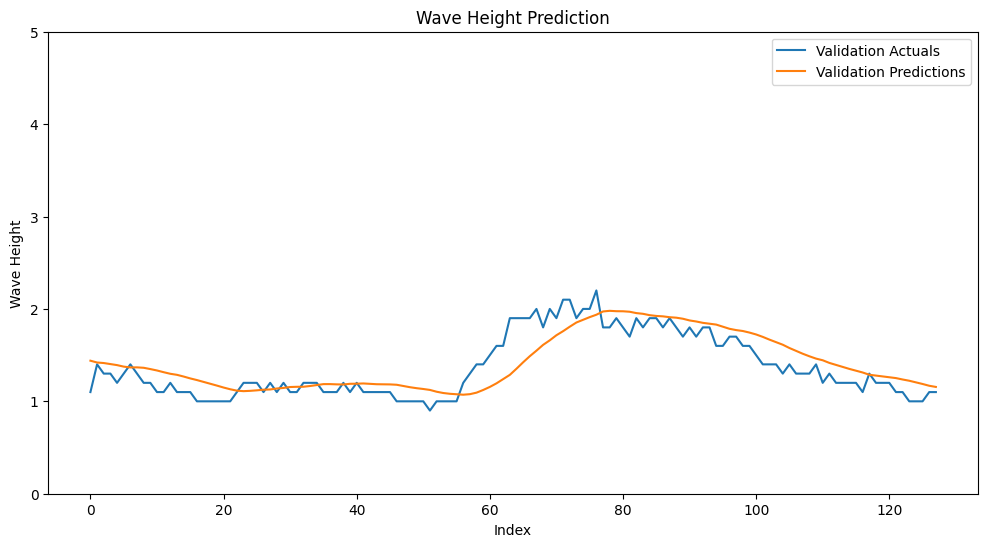

In [ ]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(val_actuals[0], label="Validation Actuals")
plt.plot(val_preds[:, 0], label="Validation Predictions")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Wave Height")
plt.title("Wave Height Prediction")
plt.ylim(0, 5)  # Set the y-axis limits
plt.show()

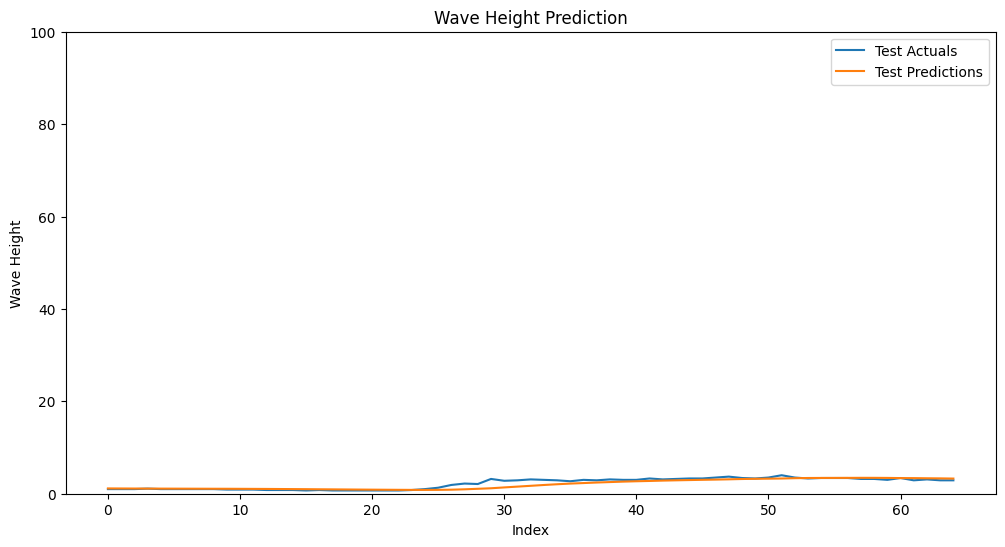

In [ ]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_actuals[0], label="Test Actuals")
plt.plot(test_preds[:, 0], label="Test Predictions")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Wave Height")
plt.title("Wave Height Prediction")
plt.ylim(0, 100)  # Set the y-axis limits
plt.show()

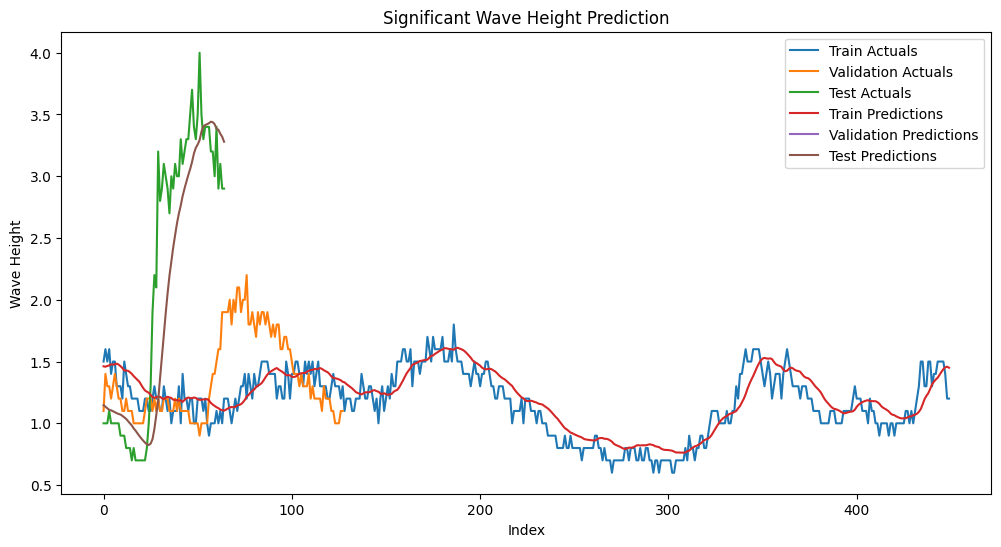

In [ ]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_actuals[0], label="Train Actuals")
plt.plot(val_actuals[0], label="Validation Actuals")
plt.plot(test_actuals[0], label="Test Actuals")
plt.plot(train_preds[:, 0], label="Train Predictions")
plt.plot(val_preds[0], label="Validation Predictions")
plt.plot(test_preds[:, 0], label="Test Predictions")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Wave Height")
plt.title("Significant Wave Height Prediction")
plt.show()